<h1>This practice is about learning phone_prices data so as to perform prediction on prices giving some labels values.</h1

<h3>&#x2022; First let's load data and get look on some visualizations</h3>

In [3]:
import numpy as np
import pandas as pd
from scripts import data_fetch
import matplotlib.pyplot as plt

PATH_DATA = 'DATASETS/phone_price'
data: pd.DataFrame = data_fetch.load_data(PATH_DATA, 'cleaned_all_phones.csv')
# let's look what our data look like
print(data.describe())

            inches      battery      ram(GB)    weight(g)  storage(GB)  \
count  1512.000000  1512.000000  1512.000000  1512.000000  1512.000000   
mean      6.422460  4389.798942     6.683862   187.636243   109.164683   
std       0.477043   784.607022     2.701433    26.200115    74.436484   
min       3.800000  1821.000000     1.000000   130.000000     1.000000   
25%       6.300000  4000.000000     4.000000   175.000000    64.000000   
50%       6.500000  4500.000000     8.000000   187.000000   128.000000   
75%       6.670000  5000.000000     8.000000   197.250000   128.000000   
max      10.400000  7250.000000    24.000000   500.000000   512.000000   

        price(USD)  
count  1512.000000  
mean    337.847036  
std     266.740821  
min      40.000000  
25%     179.997500  
50%     260.000000  
75%     400.000000  
max    2300.000000  




<h3>Description</h3>
<p>Based on what we have in the description of our data, we can say that if you wanna buy a phone you have to expected at mean 337.847036 bucks. On the same description, 25%(1st quartile) of phones cost lower than 179.997500 bucks, 50%(2nd quartile) of phones cost lower than 260.000000 bucks and 75%(3rd quartile) of phones cost lower than 400.000000 bucks. The most expensive phone cost 2300.000000 bucks. Wow so expensive ! Right ?</p>

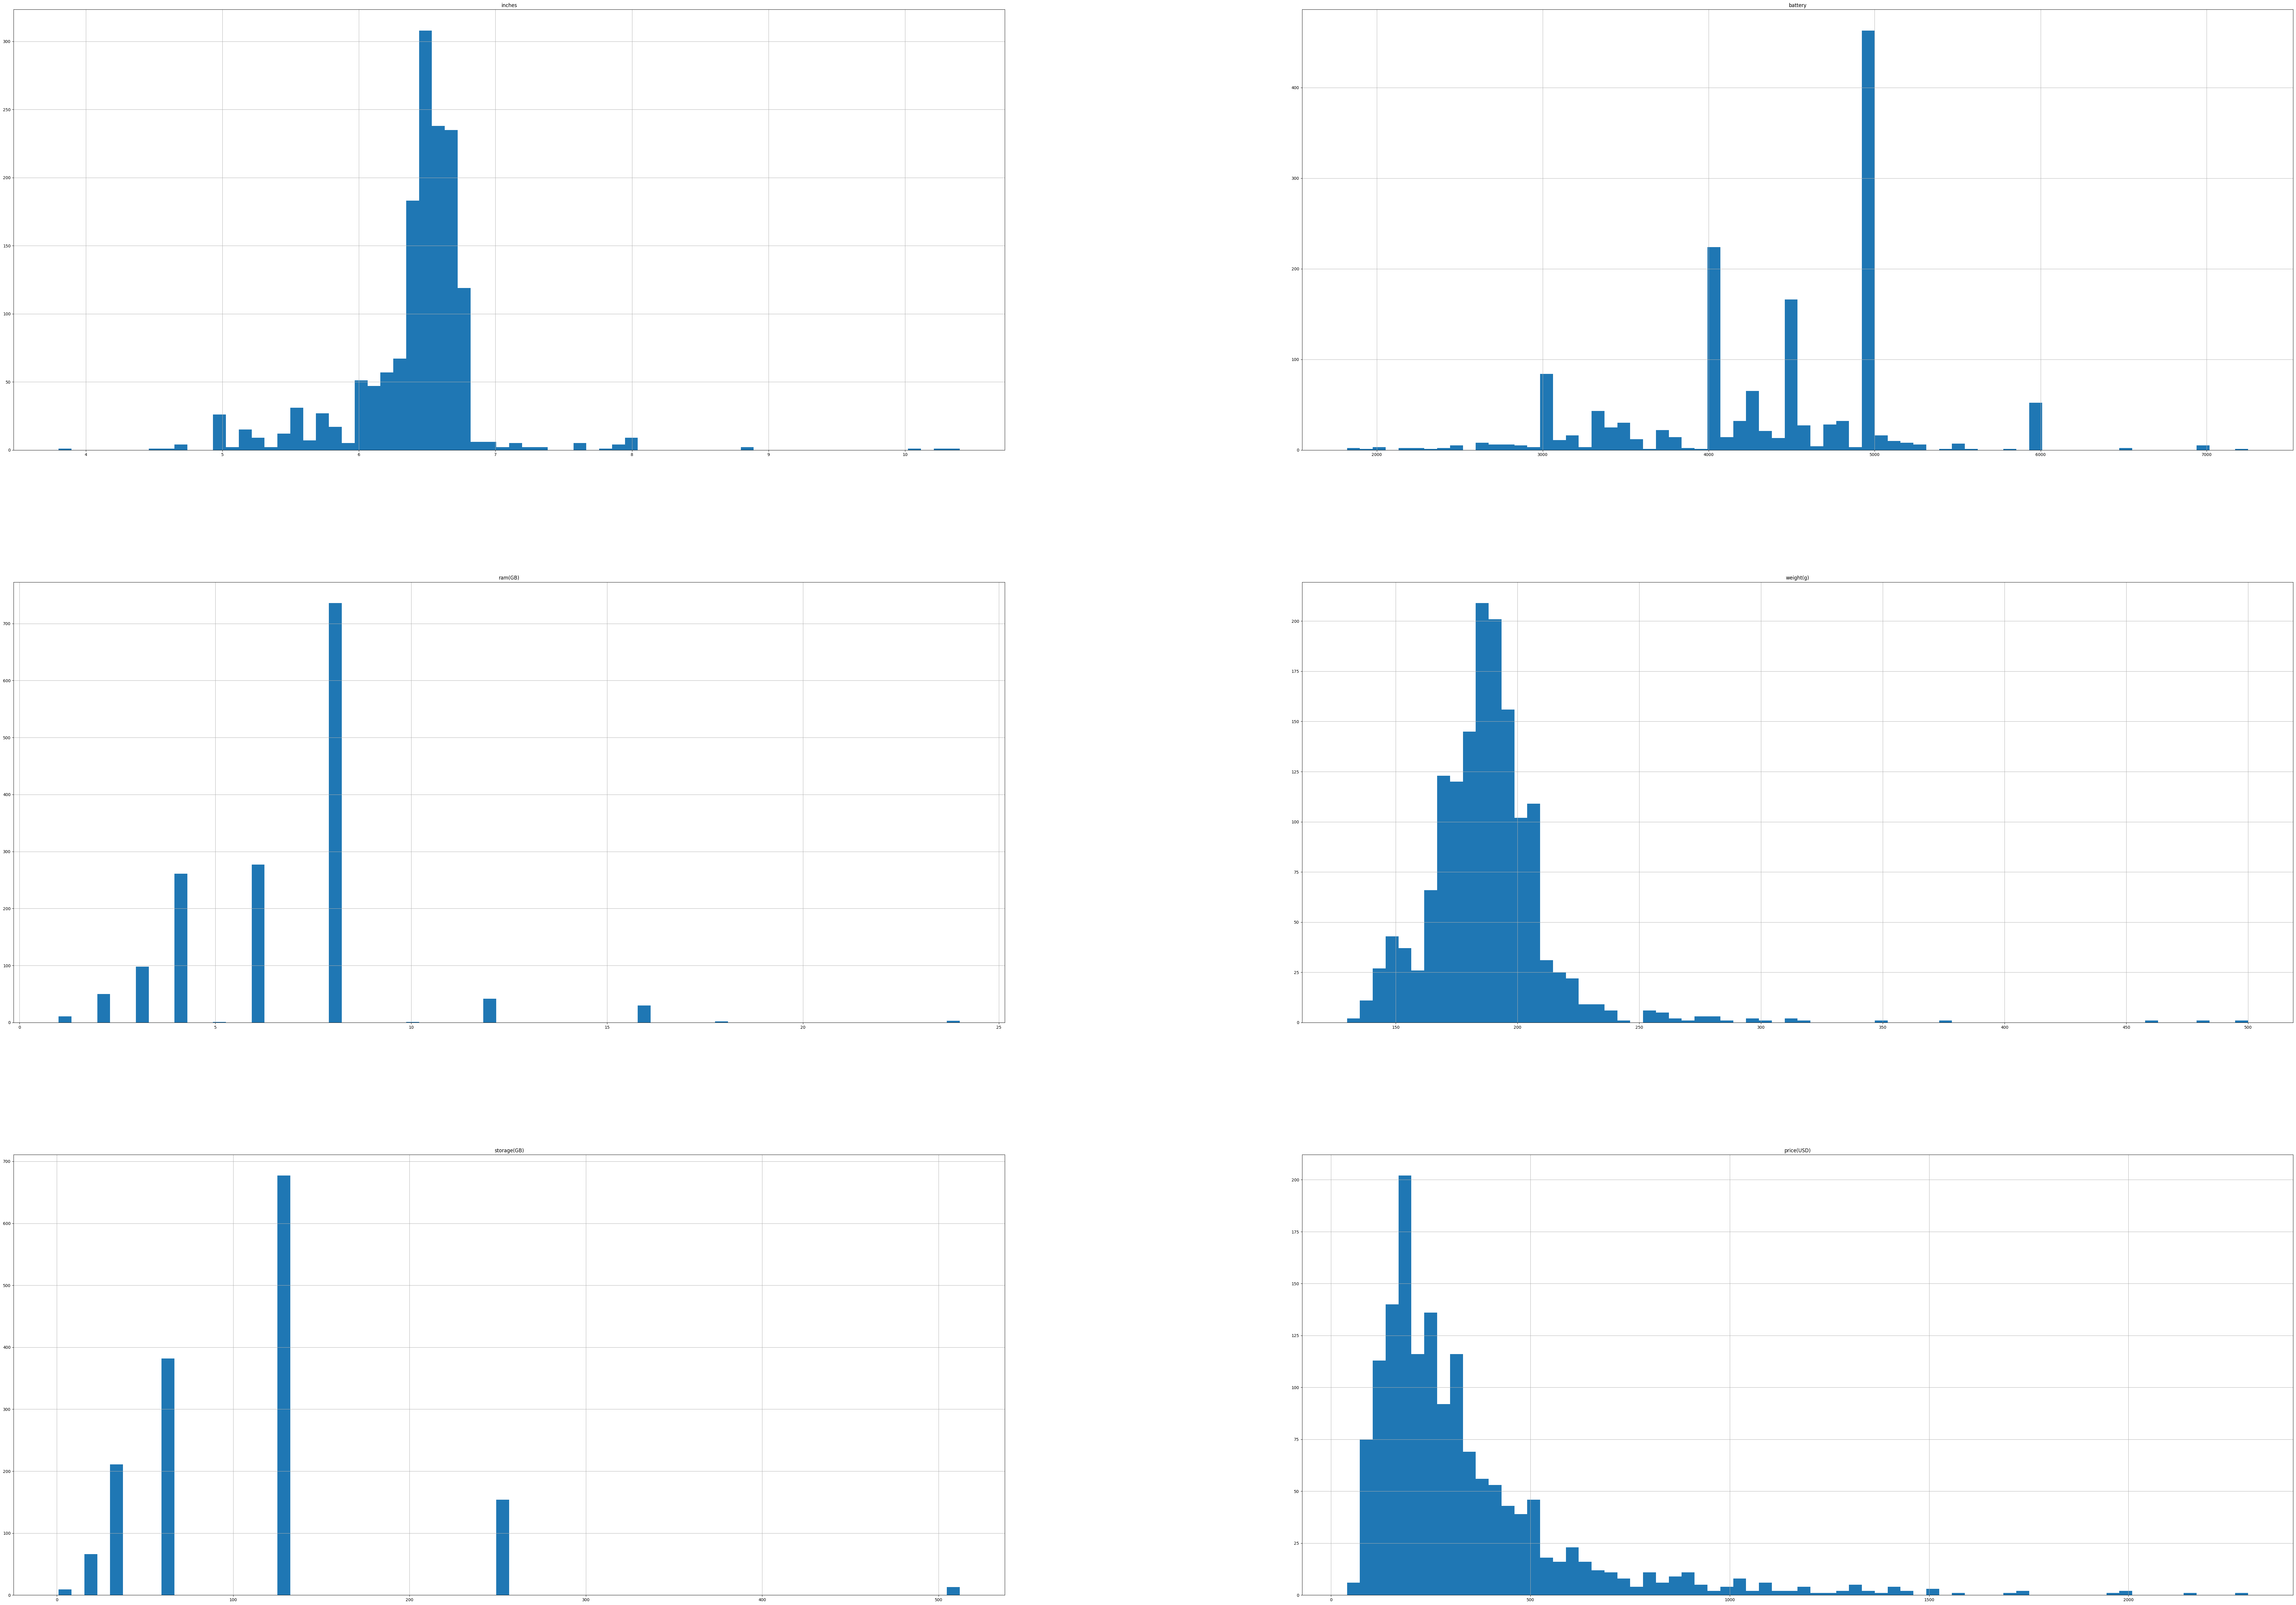

In [5]:
data.hist(bins=70, figsize=(100,70))
plt.show()

In [ ]:
#create train and test set help understand data and performs good learning avoided some data bias

# for do that may be you have the idea of shuffling data. You are right but by doing that we can have serious problems about having  data